In [ ]:
#Random Forest - fine tuning hyper parameter

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [8]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_level4_feature_selection.csv', encoding='latin1',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169001 entries, 0 to 169000
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Host Response Time        169001 non-null  float64
 1   Host Response Rate        169001 non-null  float64
 2   Is Superhost              169001 non-null  float64
 3   neighbourhood             169001 non-null  float64
 4   Postal Code               169001 non-null  float64
 5   Is Exact Location         169001 non-null  float64
 6   Property Type             169001 non-null  float64
 7   Accomodates               169001 non-null  float64
 8   Bathrooms                 169001 non-null  float64
 9   Bedrooms                  169001 non-null  float64
 10  Beds                      169001 non-null  float64
 11  Price                     169001 non-null  float64
 12  Guests Included           169001 non-null  float64
 13  Min Nights                169001 non-null  f

Unique Keys Count for Each Price Category:
  Price Category  Unique Keys Count
0            Low               2349
1           High                604

Examples from Low Price DataFrame:
         Unique Key
0   12047.0-0.0-2.0
1   10405.0-0.0-1.0
2   10178.0-0.0-1.0
15  13189.0-0.0-2.0
17  10963.0-0.0-2.0

Examples from High Price DataFrame:
            Unique Key
50     10245.0-0.0-2.0
68     10179.0-0.0-2.0
241    10437.0-0.0-3.0
999   10115.0-10.0-3.0
1129   10117.0-0.0-2.0


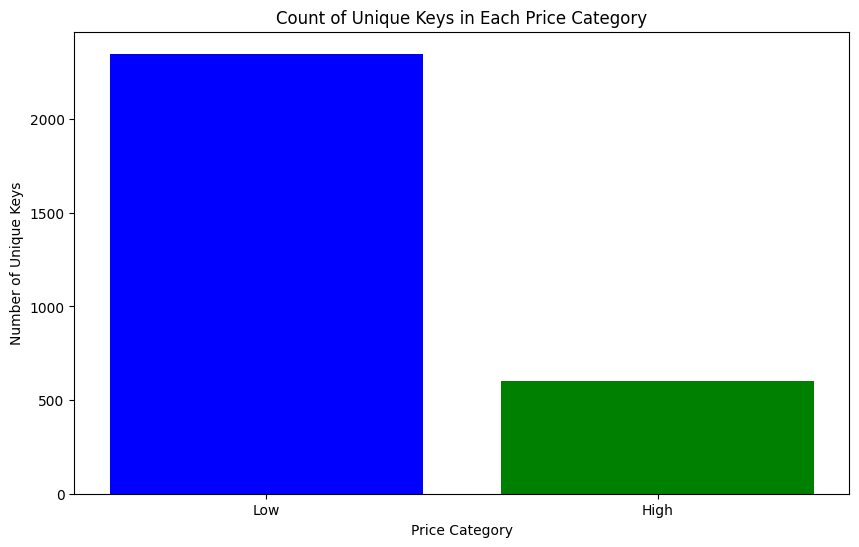

In [49]:
# Calculate the 80th percentile for 'Price'
price_80th_percentile = df['Price'].quantile(0.9)

# Split the data into low and high price DataFrames
df_low = df[df['Price'] <= price_80th_percentile]
df_high = df[df['Price'] > price_80th_percentile]

# Define columns to create a unique key
key_columns = ['Postal Code', 'Property Type', 'Beds']

# Create a unique key by combining selected columns
df_low['Unique Key'] = df_low[key_columns].astype(str).agg('-'.join, axis=1)
df_high['Unique Key'] = df_high[key_columns].astype(str).agg('-'.join, axis=1)

# Count unique keys for each group
unique_keys_low = df_low['Unique Key'].nunique()
unique_keys_high = df_high['Unique Key'].nunique()

# Create a DataFrame to show the results
unique_keys_df = pd.DataFrame({
    'Price Category': ['Low', 'High'],
    'Unique Keys Count': [unique_keys_low, unique_keys_high]
})

# Print results
print("Unique Keys Count for Each Price Category:")
print(unique_keys_df)

# Display examples of unique keys
print("\nExamples from Low Price DataFrame:")
print(df_low[['Unique Key']].drop_duplicates().head(5))

print("\nExamples from High Price DataFrame:")
print(df_high[['Unique Key']].drop_duplicates().head(5))

# Create bar plots for unique keys count
plt.figure(figsize=(10, 6))
plt.bar(unique_keys_df['Price Category'], unique_keys_df['Unique Keys Count'], color=['blue', 'green'])
plt.xlabel('Price Category')
plt.ylabel('Number of Unique Keys')
plt.title('Count of Unique Keys in Each Price Category')
plt.show()

In [ ]:
models_list = pd.DataFrame()

In [20]:
X = df.loc[:,df.columns != 'Price']
y = df['Price']

In [21]:
# RandomForestRegressor - GridSearchCV 

In [22]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50,70, 100],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [ 10, 15, 20,25],  # Maximum number of levels in tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2,5],  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=1)

#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; tota

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 70, 100]},
             verbose=2)

In [24]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 70}
Best Score: 0.07416065162047454


In [34]:
# Example best parameters from GridSearchCV (update with actual values)
grid_search_best_params = {
    'n_estimators': 70,          
    'max_features': 'sqrt',       
    'max_depth': 10,            
    'min_samples_split': 5,       
    'min_samples_leaf': 5         
}

# Create a new RandomForestRegressor with the best parameters
best_rf = RandomForestRegressor(
    n_estimators=grid_search_best_params['n_estimators'],
    max_features=grid_search_best_params['max_features'],
    max_depth=grid_search_best_params['max_depth'],
    min_samples_split=grid_search_best_params['min_samples_split'],
    min_samples_leaf=grid_search_best_params['min_samples_leaf'],
    random_state=1  # Ensure reproducibility
)

# Fit the new model with the training data
best_rf.fit(X, y)

# Make predictions with the new model
predictions = best_rf.predict(X)

# Evaluate the performance of the new model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Create a DataFrame to store the results
    metrics_df = pd.DataFrame({
        'Metric': ['MSE', 'RMSE', 'MAE', 'R² Score'],
        'Value': [mse, rmse, mae, r2]
    })
    
    return metrics_df

# Call the evaluation function and store the results in a DataFrame
metrics_df = evaluate_model(y, predictions)

# Print the DataFrame containing the metrics
print("RandomForestRegressor Performance Metrics:")
metrics_df_transposed = metrics_df.set_index('Metric').T

# Print the transposed DataFrame
print("Transposed Metrics DataFrame:")
(metrics_df_transposed)

RandomForestRegressor Performance Metrics:
Transposed Metrics DataFrame:


Metric,MSE,RMSE,MAE,R² Score
Value,2.309500e+07,4805.725738,167.063297,0.626199


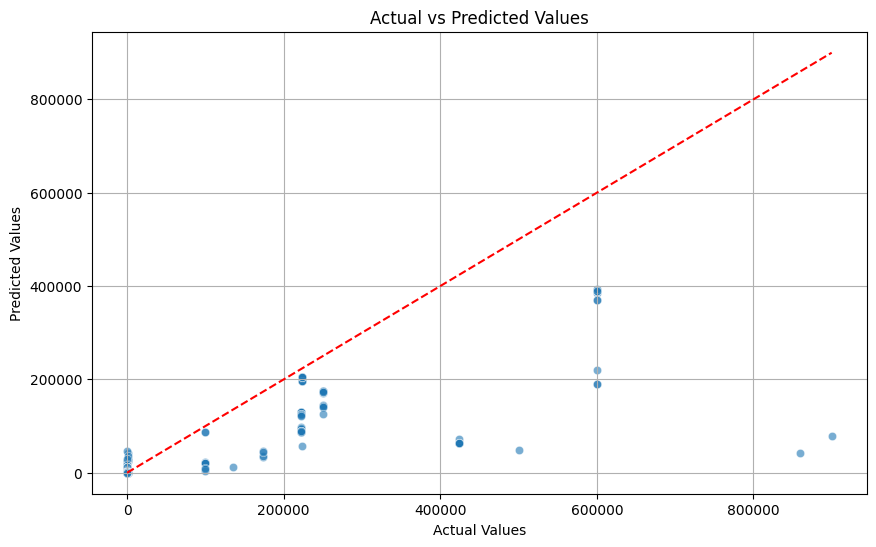

In [35]:
# Evaluate the model with the predictions
def showplote(y_true, y_pred):

    # Plotting Predictions vs Actual Values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y, y=predictions, alpha=0.6)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Diagonal line for reference
    plt.grid(True)
    plt.show()

# Call the evaluation function and plot
showplote(y, predictions)

In [36]:
# Calculate the 80th percentile for 'Price'
price_80th_percentile = df['Price'].quantile(0.8)

# Split the data into low and high price DataFrames
df_low = df[df['Price'] <= price_80th_percentile]
df_high = df[df['Price'] > price_80th_percentile]

# Separate features and target variable for low and high price DataFrames
X_low = df_low.drop(columns='Price')
y_low = df_low['Price']

X_high = df_high.drop(columns='Price')
y_high = df_high['Price']

# Define the best parameters for RandomForestRegressor
best_params = {
    'n_estimators': 70,          
    'max_features': 'sqrt',       
    'max_depth': 10,            
    'min_samples_split': 5,       
    'min_samples_leaf': 5         
}

# Train RandomForestRegressor on low price data
rf_low = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=1
)
rf_low.fit(X_low, y_low)
predictions_low = rf_low.predict(X_low)

# Train RandomForestRegressor on high price data
rf_high = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=1
)
rf_high.fit(X_high, y_high)
predictions_high = rf_high.predict(X_high)

# Define the evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    }
    
    return metrics

# Evaluate models
metrics_low = evaluate_model(y_low, predictions_low)
metrics_high = evaluate_model(y_high, predictions_high)

# Create a DataFrame with metrics for both models
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R² Score'],
    'Low Price Model': [metrics_low['MSE'], metrics_low['RMSE'], metrics_low['MAE'], metrics_low['R² Score']],
    'High Price Model': [metrics_high['MSE'], metrics_high['RMSE'], metrics_high['MAE'], metrics_high['R² Score']]
})

# Transpose the DataFrame
metrics_df_transposed = metrics_df.set_index('Metric').T

# Print the transposed DataFrame
print("Transposed Metrics DataFrame:")
(metrics_df_transposed)

Transposed Metrics DataFrame:


Metric,MSE,RMSE,MAE,R² Score
Low Price Model,1.599102e+02,12.645562,9.991421,0.533314
High Price Model,8.973244e+07,9472.720921,645.708067,0.709285


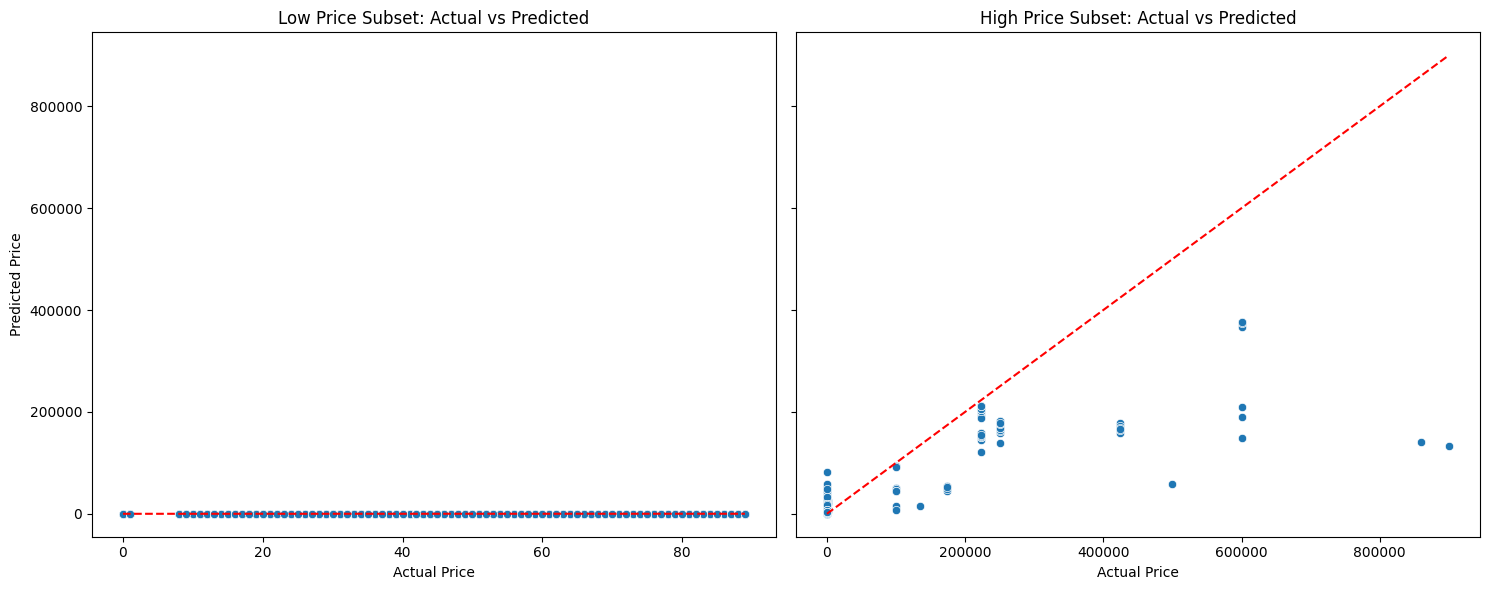

In [37]:
# Plotting low and high prices groups
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Low price subset plot
sns.scatterplot(x=y_low, y=predictions_low, ax=axs[0])
axs[0].set_title('Low Price Subset: Actual vs Predicted')
axs[0].set_xlabel('Actual Price')
axs[0].set_ylabel('Predicted Price')
axs[0].plot([y_low.min(), y_low.max()], [y_low.min(), y_low.max()], 'r--', linestyle='--', color='red')

# High price subset plot
sns.scatterplot(x=y_high, y=predictions_high, ax=axs[1])
axs[1].set_title('High Price Subset: Actual vs Predicted')
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Predicted Price')
axs[1].plot([y_high.min(), y_high.max()], [y_high.min(), y_high.max()], 'r--', linestyle='--', color='red')

plt.tight_layout()
plt.show()